#  Exploratory Analysis on which cities has the most volatile markets
### Paul Samaniego

In [2]:
import pandas as pd
import os
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import project1scripts

In [3]:
cwd = os.getcwd()
print(cwd)

C:\Users\Saman\Coolest-project-1


In [4]:
filename = "clean_median_sale_price_v2_df.csv"
df = pd.read_csv(filename, index_col=0)
df.head()

,RegionName,StateName,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
0,"New York, NY",NY,34491100.0,33935000.0,33535000.0,33351700,34200000,35600000,37100000,38066700,...,54333300,52833300,51833300,51533300,50950000,51033300,51666700,53583300,55833300,57966700
1,"Los Angeles, CA",CA,39400000.0,39733300.0,40733300.0,43066700,45066700,46500000,46833300,47166700,...,85200000,84033300,82700000,81833300,81666700,82733300,83900000,85400000,87333300,88833300
2,"Chicago, IL",IL,16283300.0,15800000.0,16021800.0,17021800,18338500,19783300,20750000,21233300,...,28500000,27833300,27333300,27000000,26900000,27563300,28730000,30030000,31316700,31983300
3,"Dallas, TX",TX,15166700.0,15216700.0,15533300.0,16450000,17280000,17846700,18163300,18112500,...,39050000,38250000,37333300,36333300,36233300,36700000,37700000,38466700,39500000,40033300
4,"Houston, TX",TX,14983300.0,14857200.0,15040500.0,16015500,16741700,17490000,17765000,17865000,...,32100000,31600000,31066700,30600000,30433300,30633300,31333300,32166700,32866700,33366700


In [5]:
#Author: anderoos
df['StateName'] = df['StateName'].astype('str')
# Define categories
northeast = ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA']
southeast = ['DE', 'MD', 'VA', 'WV', 'NC', 'SC', 'GA', 'FL', 'AL', 'MS', 'LA', 'KY', 'TN']
midwest = ['OH', 'IN', 'IL', 'MI', 'WI', 'MN', 'IA', 'MO', 'ND', 'SD', 'NE', 'KS']
west = ['MT', 'ID', 'WY', 'CO', 'NM', 'AZ', 'UT', 'NV', 'CA', 'OR', 'WA', 'AK', 'HI']
southwest = ['TX', 'OK', 'AR']
# Filters state codes into separate dataframes

def USRegion(value):
    if value in northeast:
        return "northeast"
    elif value in southeast:
        return "southeast"
    elif value in midwest:
        return "midwest"
    elif value in west:
        return "west"
    elif value in southwest:
        return "southwest"



df.insert(loc=0, column = "US Region", value = df["StateName"].apply(USRegion))

df.head()
    

,US Region,RegionName,StateName,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
0,northeast,"New York, NY",NY,34491100.0,33935000.0,33535000.0,33351700,34200000,35600000,37100000,...,54333300,52833300,51833300,51533300,50950000,51033300,51666700,53583300,55833300,57966700
1,west,"Los Angeles, CA",CA,39400000.0,39733300.0,40733300.0,43066700,45066700,46500000,46833300,...,85200000,84033300,82700000,81833300,81666700,82733300,83900000,85400000,87333300,88833300
2,midwest,"Chicago, IL",IL,16283300.0,15800000.0,16021800.0,17021800,18338500,19783300,20750000,...,28500000,27833300,27333300,27000000,26900000,27563300,28730000,30030000,31316700,31983300
3,southwest,"Dallas, TX",TX,15166700.0,15216700.0,15533300.0,16450000,17280000,17846700,18163300,...,39050000,38250000,37333300,36333300,36233300,36700000,37700000,38466700,39500000,40033300
4,southwest,"Houston, TX",TX,14983300.0,14857200.0,15040500.0,16015500,16741700,17490000,17765000,...,32100000,31600000,31066700,30600000,30433300,30633300,31333300,32166700,32866700,33366700


In [6]:
df_regions_northeast = df[df["US Region"] == "northeast"]
df_regions_northeast.head()

,US Region,RegionName,StateName,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
0,northeast,"New York, NY",NY,34491100.0,33935000.0,33535000.0,33351700,34200000,35600000,37100000,...,54333300,52833300,51833300,51533300,50950000,51033300,51666700,53583300,55833300,57966700
6,northeast,"Philadelphia, PA",PA,20156700.0,19541700.0,19375000.0,19750000,20800000,21966700,22966700,...,32113300,31613300,31246700,30800000,30300000,30500000,31066700,32233300,33733300,35000000
9,northeast,"Boston, MA",MA,31566700.0,30833300.0,30533300.0,31600000,33000000,35066700,36111700,...,60666700,59666700,58633300,57666700,56000000,57141700,59391700,62741700,65266700,67016700
26,northeast,"Pittsburgh, PA",PA,12500000.0,12475000.0,12708300.0,13132300,13682300,14155700,14348300,...,21300000,20633300,20000000,19166700,18833300,19163300,20063300,21063300,22366700,23233400
37,northeast,"Providence, RI",RI,19525000.0,19075000.0,18833300.0,19166700,20000000,21280000,21980000,...,39966700,39850000,39183300,38716700,38183300,38183300,38850000,40050000,41716700,42716700


In [7]:
#calculating the rolling 12 month average, for the the first 11 months just doing the minimum
northeast_cities_df = df_regions_northeast.drop(columns=["US Region", "StateName"]).set_index("RegionName")
moving_avg_northeast_df = northeast_cities_df.rolling(window=12, axis=1, min_periods=1).mean()
#moving_avg_midwest_df.to_csv("testing.csv")
moving_avg_northeast_df.head()


C:\Users\Saman\AppData\Local\Temp\ipykernel_33128\1592072962.py:3: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  moving_avg_northeast_df = northeast_cities_df.rolling(window=12, axis=1, min_periods=1).mean()


,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
RegionName,,,,,,,,,,,,,,,,,,,,,
"New York, NY",34491100.0,34213050.0,3.398703e+07,33828200.0,33902560.0,3.418547e+07,3.460183e+07,35034937.5,3.534309e+07,35499610.0,...,5.320927e+07,5.335371e+07,5.344815e+07,5.351759e+07,5.353287e+07,5.353008e+07,5.349675e+07,5.350369e+07,5.355924e+07,5.369690e+07
"Philadelphia, PA",20156700.0,19849200.0,1.969113e+07,19705850.0,19924680.0,2.026502e+07,2.065097e+07,20986262.5,2.115446e+07,21189010.0,...,3.059868e+07,3.080902e+07,3.100826e+07,3.118888e+07,3.137388e+07,3.156166e+07,3.172832e+07,3.185332e+07,3.195610e+07,3.208666e+07
"Boston, MA",31566700.0,31200000.0,3.097777e+07,31133325.0,31506660.0,3.210000e+07,3.267310e+07,33186250.0,3.346686e+07,33585170.0,...,6.000335e+07,6.032974e+07,6.053668e+07,6.066308e+07,6.070502e+07,6.076710e+07,6.080835e+07,6.086460e+07,6.089793e+07,6.100766e+07
"Pittsburgh, PA",12500000.0,12487500.0,1.256110e+07,12703900.0,12899580.0,1.310893e+07,1.328599e+07,13423987.5,1.348984e+07,13497530.0,...,2.087965e+07,2.091298e+07,2.091298e+07,2.088125e+07,2.084118e+07,2.081055e+07,2.079499e+07,2.078221e+07,2.080708e+07,2.085625e+07
"Providence, RI",19525000.0,19300000.0,1.914443e+07,19150000.0,19320000.0,1.964667e+07,1.998000e+07,20261250.0,2.041630e+07,20487000.0,...,3.823195e+07,3.848195e+07,3.870278e+07,3.890001e+07,3.906668e+07,3.923472e+07,3.939722e+07,3.953472e+07,3.968056e+07,3.984584e+07


In [8]:
number_of_periods = len(moving_avg_northeast_df.columns)

growth_rate_by_state = pd.DataFrame({
    "Growth Rate":((moving_avg_northeast_df["7/31/2023"] / 
                           moving_avg_northeast_df["1/31/2013"])**(12/number_of_periods)-1)
})

top_3_cities = growth_rate_by_state["Growth Rate"].nlargest(3).index
bottom_3_cities = growth_rate_by_state["Growth Rate"].nsmallest(3).index

cities_to_plot = [item for sublist in [top_3_cities, bottom_3_cities] for item in sublist]

top_bottom_cities = pd.DataFrame({"RegionName":cities_to_plot}).set_index("RegionName")
cities_to_plot
#growth_rate_by_state.head()
#top_bottom_cities.head()

['Laconia, NH',
 'Concord, NH',
 'Lewiston, ME',
 'Sunbury, PA',
 'Indiana, PA',
 'Somerset, PA']

In [9]:
top_bottom_cities_combined = growth_rate_by_state.merge(moving_avg_northeast_df[["1/31/2013", "7/31/2023"]].div(100), on="RegionName", how="left")
df_to_plot = top_bottom_cities_combined[top_bottom_cities_combined.index.isin(cities_to_plot)]
#df_to_plot.to_csv("testingv5.csv")
df_to_plot

,Growth Rate,1/31/2013,7/31/2023
RegionName,,,
"Concord, NH",0.078868,175067.0,390947.166667
"Lewiston, ME",0.078405,128783.0,286284.833333
"Sunbury, PA",0.016371,80973.0,96156.000000
"Indiana, PA",0.020242,109833.0,135781.250000
"Somerset, PA",0.031266,122167.0,169224.000000
"Laconia, NH",0.082430,172467.0,398813.750000


In [10]:
#bars = plt.bar(df_to_plot.index, df_to_plot["7/31/2023"])

#for i, bar in enumerate(bars):
#    growth_rate = df_to_plot['Growth Rate'].iloc[i]
#    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1000, f'{growth_rate:.2%}', ha="center")

#plt.xlabel("City")
#plt.ylabel("Sales in Thousands")

#plt.title("Top 3 / Bottom 3 Midwest Cities")

#plt.grid(True)
#plt.xticks(rotation=45, ha="right")

#plt.tight_layout()
#plt.show()

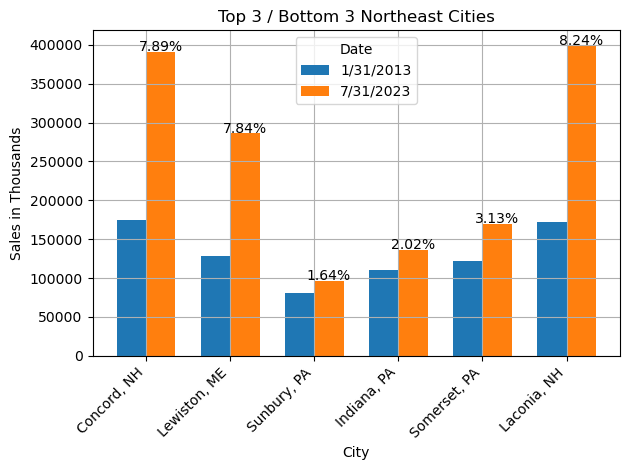

In [11]:
# Extract data
cities = df_to_plot.index
values_1_31_2013 = df_to_plot["1/31/2013"]
values_7_31_2023 = df_to_plot["7/31/2023"]

# Define the width of each bar group
bar_width = 0.35

# Create an array of indices for x-axis positions
x_indices = np.arange(len(cities))

# Create two sets of bars for each city
plt.bar(x_indices - bar_width/2, values_1_31_2013, width=bar_width, label='1/31/2013')
plt.bar(x_indices + bar_width/2, values_7_31_2023, width=bar_width, label='7/31/2023')

# Add labels to the x-axis ticks
plt.xticks(x_indices, cities, rotation=45, ha="right")

# Display the Growth Rate values above each bar
for i, value_7_31_2023 in enumerate(values_7_31_2023):
    growth_rate = df_to_plot['Growth Rate'].iloc[i]
    plt.text(x_indices[i] + bar_width/2, value_7_31_2023 + 1000, f'{growth_rate:.2%}', ha="center")

plt.xlabel("City")
plt.ylabel("Sales in Thousands")
plt.title("Top 3 / Bottom 3 Northeast Cities")

plt.grid(True)
plt.legend(title="Date")
plt.tight_layout()
plt.show()

In [12]:
top_bottom_cities_combined_line = top_bottom_cities.merge(moving_avg_northeast_df.div(100), on="RegionName", how="left")
#df_to_plot_line = top_bottom_cities_combined_line[top_bottom_cities_combined_line.index.isin(cities_to_plot)]
#df_to_plot.to_csv("testingv5.csv")
#df_to_plot_line
top_bottom_cities_combined_line

,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
RegionName,,,,,,,,,,,,,,,,,,,,,
"Laconia, NH",172467.0,167133.5,163800.000000,163308.25,165346.6,167811.000000,169690.428571,171391.625,172440.666667,172713.3,...,375568.416667,381124.833333,385499.833333,388234.083333,388718.333333,389511.833333,388150.750000,389803.583333,392827.666667,398813.750000
"Concord, NH",175067.0,174733.5,175155.666667,177683.50,180833.4,184177.833333,187100.000000,189645.875,190870.444444,191600.1,...,369797.250000,371741.666667,373408.333333,374747.166667,377752.750000,380950.916667,384254.666667,386752.750000,389086.083333,390947.166667
"Lewiston, ME",128783.0,124345.5,123977.666667,123931.25,126445.0,128378.833333,129260.142857,129816.875,129751.111111,131148.5,...,259459.750000,261141.750000,263386.166667,266914.000000,270539.000000,274511.166667,277940.333333,280758.416667,283534.833333,286284.833333
"Sunbury, PA",80973.0,79306.5,75898.666667,74049.00,74672.6,76252.166667,78118.571429,78185.000,78386.666667,78881.3,...,109288.833333,108798.583333,107072.250000,105440.250000,102226.083333,99595.250000,97374.083333,96236.583333,95522.666667,96156.000000
"Indiana, PA",109833.0,110791.5,105500.000000,101187.50,100070.0,101241.666667,102459.571429,104040.625,104714.777778,104420.8,...,128060.250000,128559.500000,129047.750000,129105.333333,129705.000000,129986.833333,131116.333333,131816.916667,133631.250000,135781.250000
"Somerset, PA",122167.0,126250.0,122944.333333,118500.00,113766.6,112486.000000,111854.714286,110897.875,109718.444444,109693.3,...,178592.166667,179572.833333,180649.166667,180529.666667,178785.166667,175517.083333,173401.750000,171175.333333,170890.666667,169224.000000


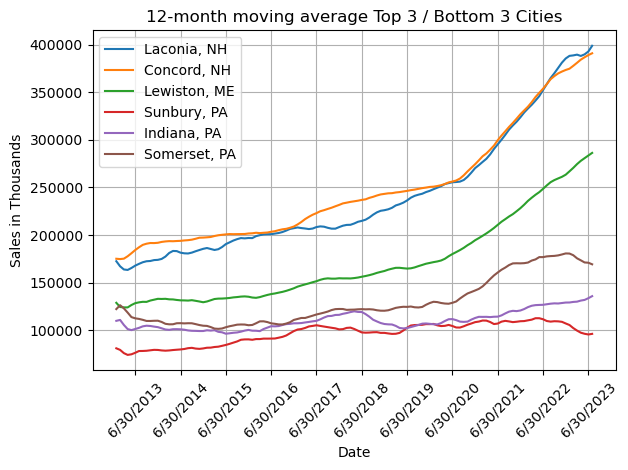

In [13]:
df_transposed = top_bottom_cities_combined_line.transpose()

custom_x_ticks = ["6/30/2013", "6/30/2014", "6/30/2015","6/30/2016", "6/30/2017","6/30/2018",
                  "6/30/2019", "6/30/2020", "6/30/2021", "6/30/2022", "6/30/2023"]

for region in df_transposed.columns:
    plt.plot(df_transposed.index, df_transposed[region], label=region)

plt.title("12-month moving average Top 3 / Bottom 3 Cities")
plt.xlabel("Date")
plt.ylabel("Sales in Thousands")
plt.legend()
plt.grid(True)
plt.xticks(custom_x_ticks, rotation=45)
plt.tight_layout()
plt.show()